In [1]:
import imp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image
from pathlib import Path

import imageio
import imgaug as ia
from imgaug import augmenters as iaa
import torchvision.transforms as T

/tmp/ipykernel_572404/4312732.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


In [2]:
PART = 'train'

PATH = Path('/home/s1m00n/research/vwsd/data').resolve() / f"{PART}_v1"
PATH

PosixPath('/home/s1m00n/research/vwsd/data/train_v1')

In [3]:
data = pd.read_csv(PATH / f"{PART}.data.v1.txt", sep='\t', header=None)
data.columns = ['word', 'context'] + [f'image{i}' for i in range(10)]
data2 = pd.read_csv(PATH / f"{PART}.gold.v1.txt", sep='\t', header=None)
data['image_gold'] = data2
data

word             context           image0          image1  \
0          moorhen    moorhen swamphen      image.3.jpg     image.8.jpg   
1          serinus       serinus genus      image.3.jpg    image.23.jpg   
2        pegmatite   pegmatite igneous     image.41.jpg    image.39.jpg   
3       bangalores  bangalores torpedo     image.58.jpg    image.59.jpg   
4           bonxie         bonxie skua      image.3.jpg    image.77.jpg   
...            ...                 ...              ...             ...   
12864      bomarea       bomarea genus  image.11820.jpg     image.3.jpg   
12865   tragopogon    tragopogon genus      image.3.jpg  image.6250.jpg   
12866  illustrator  illustrator artist  image.10633.jpg   image.723.jpg   
12867   brunfelsia    brunfelsia genus      image.3.jpg  image.8911.jpg   
12868     headband       headband band    image.340.jpg  image.7485.jpg   

                image2           image3           image4           image5  \
0          image.4.jpg      image.1.jpg      image.2.jpg      image.0.jpg   
1          image.4.jpg      image.1.jpg      image.2.jpg     image.20.jpg   
2         image.42.jpg     image.43.jpg     image.40.jpg     image.44.jpg   
3         image.64.jpg     image.57.jpg     image.55.jpg     image.56.jpg   
4         image.78.jpg      image.4.jpg      image.1.jpg      image.2.jpg   
...                ...              ...              ...              ...   
12864      image.4.jpg      image.1.jpg      image.2.jpg   image.1559.jpg   
12865  image.15001.jpg      image.4.jpg      image.1.jpg      image.2.jpg   
12866  image.13372.jpg    image.881.jpg  image.12635.jpg    image.726.jpg   
12867   image.5195.jpg      image.4.jpg  image.12827.jpg      image.1.jpg   
12868   image.8747.jpg  image.12401.jpg    image.343.jpg  image.12122.jpg   

                image6          image7          image8           image9  \
0          image.5.jpg     image.6.jpg     image.7.jpg      image.9.jpg   
1          image.5.jpg    image.24.jpg    image.22.jpg     image.21.jpg   
2         image.37.jpg    image.38.jpg    image.36.jpg     image.35.jpg   
3         image.62.jpg    image.63.jpg    image.61.jpg     image.60.jpg   
4          image.5.jpg    image.79.jpg    image.76.jpg     image.75.jpg   
...                ...             ...             ...              ...   
12864   image.1285.jpg     image.5.jpg  image.6482.jpg  image.10937.jpg   
12865  image.12074.jpg     image.5.jpg  image.4087.jpg  image.12806.jpg   
12866   image.5985.jpg   image.722.jpg   image.724.jpg    image.725.jpg   
12867      image.2.jpg     image.5.jpg  image.9129.jpg   image.8605.jpg   
12868    image.344.jpg  image.8501.jpg   image.342.jpg   image.4550.jpg   

            image_gold  
0          image.0.jpg  
1         image.20.jpg  
2         image.35.jpg  
3         image.55.jpg  
4         image.75.jpg  
...                ...  
12864  image.11820.jpg  
12865  image.12074.jpg  
12866  image.10633.jpg  
12867   image.8911.jpg  
12868   image.8747.jpg  

[12869 rows x 13 columns]

In [9]:
# sphinx_gallery_thumbnail_path = "../../gallery/assets/transforms_thumbnail.png"

from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T


plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open(PATH / f"{PART}_images_v1" / "image.8.jpg").convert("RGB")
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

In [35]:
img_aug = T.RandomOrder([
    T.RandomHorizontalFlip(),
    T.RandomAffine(degrees=30, scale=(0.75, 1.25), shear=10),
    T.RandomAutocontrast(),
])

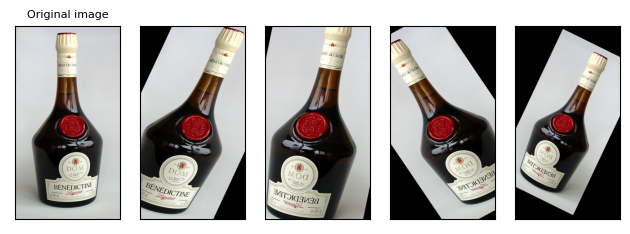

In [36]:
plot([img_aug(orig_img) for _ in range(4)])

In [22]:
def visualize_row(row):
    fig, ax = plt.subplots(2, 5, figsize=(20, 5), dpi=200)
    golden = row['image_gold']
    for i in range(10):
        col = f'image{i}'
        filename = PATH / f'{PART}_images_v1' / row[col]
        img = Image.open(filename)
        img = np.array(img)
        ax[i % 2, i // 2].imshow(img)
        ax[i % 2, i // 2].set_xticks([])
        ax[i % 2, i // 2].set_yticks([])
        if row[col] == golden:
            ax[i % 2, i // 2].add_patch(patches.Rectangle((-200,-200), img.shape[1] + 400, img.shape[0] + 400, edgecolor='red', facecolor='none', linewidth = 4, clip_on=False))
    
    fig.suptitle(f"Word={row['word']}; Context={row['context']}", fontsize=20)
    fig.tight_layout()


# row = data.sample(1, random_state=41).iloc[0]
# print(row.name)
# visualize_row(row)

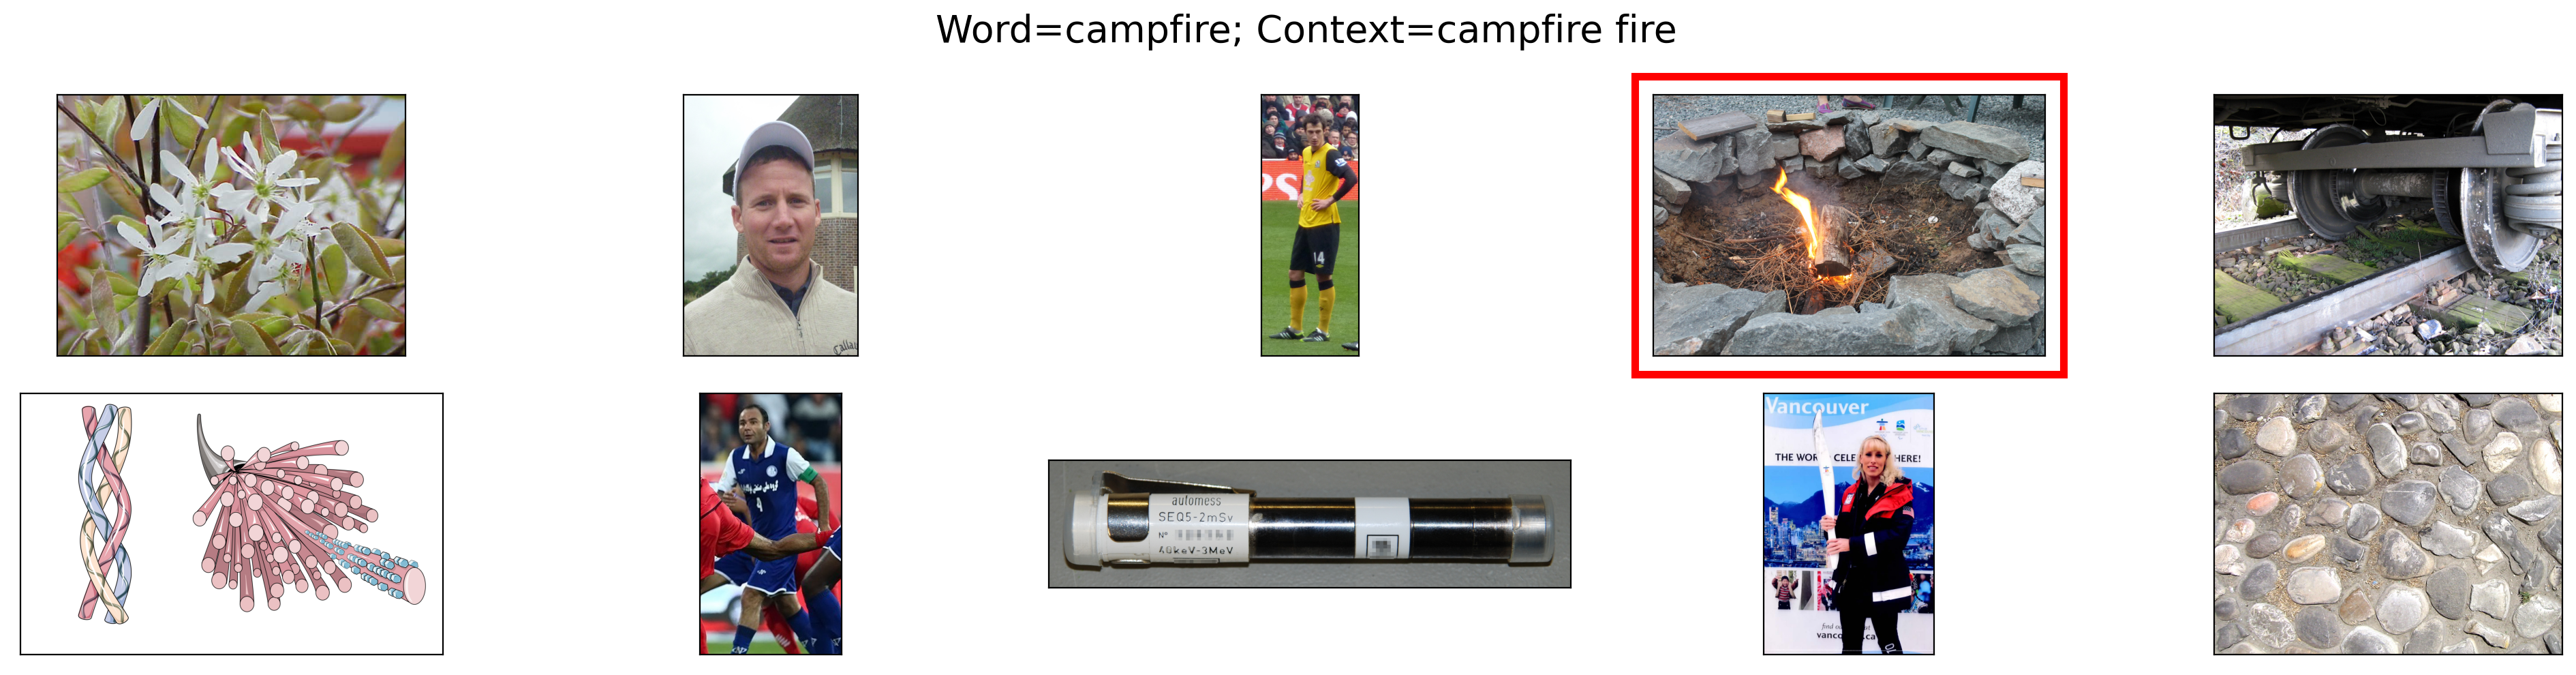

In [21]:
visualize_row(data.sample(1).iloc[0])

In [ ]:
[8, 4, 3, 3, 3, 3, 2, 4, 2, 5, 2, 3, 5, 2, 4, 7, 2, 4, 5, 5]
"""
3,   6,   7,  10,  12,  14,  19,  21,  23,  31,  32,  34,  44,
             53,  54,  66,  74,  81,  86,  88,  97, 100, 123, 130, 132, 134,
"""

In [ ]:

visualize_row(data.loc[6, :])

In [ ]:
data.context.apply(lambda x: len(x.split(' '))).value_counts()

In [ ]:
data.context.nunique()

In [ ]:
data[['word', 'context']].sample(25, random_state=41)